# With a Healthy Heart the Beat Goes On  


<img src="https://www.narayanahealth.org/sites/default/files/nh-campaigns/heart-rhythm/images/banner2.jpg" style="width: 950px;"/>

# Introduction

This dataset gives a number of variables along with a target condition of having or not having heart disease. It contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient.

In addition, we will analyze for this dataset. We will use a wide range of tools for this part. If there's value in there, we'il do it there. Finally, machine learning algorithms are estimated.

## Loading appropriate libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

## Cause of Heart Disease

1.  Excess weight, especially around the stomach area, increases a woman's risk of developing cardiovascular disease and lack of physical activity makes it worse.
2. Diabetes causes damage to blood vessels so diabetes is a major factor in developing cardiovascular disease.
3. Unhealthy foods, lack of exercise, lead to heart disease. So can high blood pressure, infections, and birth defects.
4. Smoking is one of the biggest causes of cardiovascular disease.
5. Just a few cigarettes a day can damage the blood vessels and reduce the amount of oxygen available in our blood.
*  But other things might surprise you.

#### Loading the Data

In [2]:
df=pd.read_csv('../input/heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

1.age: The person's age in years

2.sex: The person's sex (1 = male, 0 = female)

3.cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4.trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5.chol: The person's cholesterol measurement in mg/dl

6.fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7.restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8.thalach: The person's maximum heart rate achieved

9.exang: Exercise induced angina (1 = yes; 0 = no)

10.oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11.slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12.ca: The number of major vessels (0-3)

13.thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14.target: Heart disease (0 = no, 1 = yes)


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Describe function is a function that allows analysis between the numerical values contained in the data set. Using this function count, mean, std, min, max, 25%, 50%, 75%.
As seen in this section, most values are generally categorized. This means that we need to integrate other values into this situation. These; age, trestbps, chol, thalach

In [4]:
df.shape

(303, 14)

In [5]:
import pandas_profiling
x=pandas_profiling.ProfileReport(df)
x

Number of variables,14
Number of observations,303
Total Missing (%),0.0%
Total size in memory,33.2 KiB
Average record size in memory,112.3 B
Numeric,10
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,0


Here I use Pandas profiling, it reduce lots of our work.
Pandas profiling provides analysis like type, unique values, missing values, quantile statistics, mean, mode, median, standard deviation, sum, skewness, frequent values, histograms, correlation between variables, count, heatmap visualization, etc.

Looking at information of heart disease risk factors led me to the following: high cholesterol, high blood pressure, diabetes, weight, family history and smoking 3. According to another source 4, the major factors that can't be changed are: increasing age, male gender and heredity. Note that thalassemia, one of the variables in this dataset, is heredity. Major factors that can be modified are: Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes. Other factors include stress, alcohol and poor diet/nutrition.

Now,I will check null on all data and If data has null, I will sum of null data's. In this way, how many missing data is in the data.


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

there are no missing data in this dataset

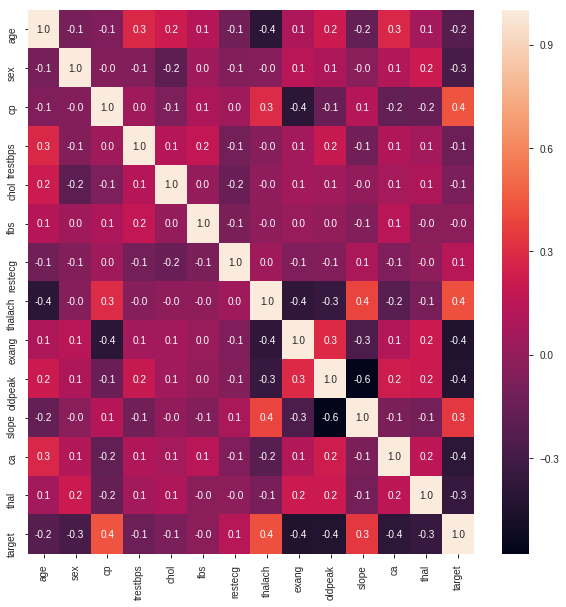

In [7]:
%matplotlib inline
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

In [8]:
df_corr=df.corr()['target'][:-1]
feature_list=df_corr[abs(df_corr)>0.1].sort_values(ascending=False)
feature_list

cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

from theabove corelation plot we see that cp(chest pain),thalch and slope are highly corelated with the target.

## Data Visulization

### TARGET

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


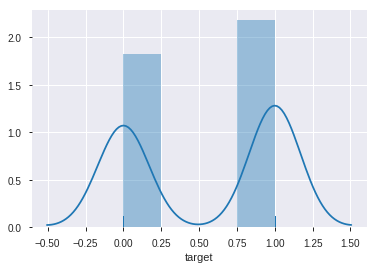

In [9]:
sns.distplot(df['target'],rug=True)
plt.show()

In [10]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
col = "target"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = {'title': 'Target(0 = No, 1 = Yes)'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

from the above plot we see that 45.5% people does not have disease and 54.5% have heart disease.

### SEX

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



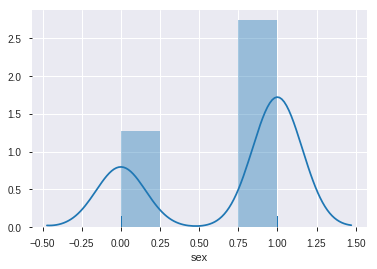

In [11]:
sns.distplot(df['sex'],rug=True)
plt.show()

In [12]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
col = "sex"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = {'title': 'Male(1), Female(0)'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In the heart disease UCI dataset only 31.7% are female and rest are male. we have find that either male or female which have likely to heart disease.

In [13]:
col='sex'
d1=df[df['target']==0]
d2=df[df['target']==1]
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name=0, marker=dict(color="#a678de"))
trace2 = go.Bar(x=v2[col], y=v2["count"], name=1, marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout={'title':"target over the sex(male or female)",'xaxis':{'title':"target"}}
#layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
iplot(fig)


##### from the above plot we see that the rate of heart disease in females have more in comprission of male. 

### Women are 4 times more likely to die from heart disease than breast cancer

* Cardiovascular disease is the leading cause of death in women in Australia with 90% of women having one risk factor. 
* The causes including high blood pressure, high cholesterol, smoking, diabetes, weight and family history are discussed.
* A woman's risk also goes up if she's had a miscarriage or had her ovaries or uterus removed.
*  Women's hearts are affected by stress and depression more than men's. Depression makes it difficult to maintain a healthy lifestyle.

### CHAIST PAIN

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



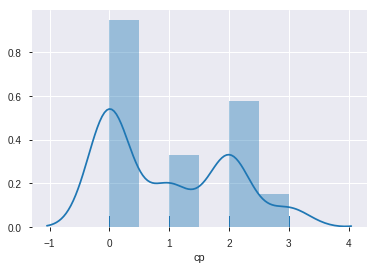

In [14]:
sns.distplot(df['cp'],rug=True)
plt.show()

In [15]:
col='cp'
d1=df[df['target']==0]
d2=df[df['target']==1]
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name=0)
trace2 = go.Bar(x=v2[col], y=v2["count"], name=1)
data = [trace1, trace2]
layout={'title':"target over the chaist pain",'xaxis':{'title':"Chaist pain type"}}
#layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
iplot(fig)


In the above plot we see that 27.2% persons having chaist pain type 0, 82% having chaist pain type 1, 79.3% having chaist pain type 2 and 69.5% having chaist pain type 3. These person have heart disease, from this data we observe that those who have chaist pain type 1 and chaist pain type 2 is more likely to affected by heart disease.

### THALACH

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



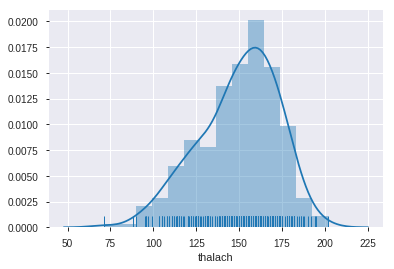

In [16]:
sns.distplot(df['thalach'],rug=True)
plt.show()

In [17]:
col='thalach'
d1=df[df['target']==0]
d2=df[df['target']==1]
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name=0, marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name=1, marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout={'title':"target over the person's maximum heart rate achieved"}
fig = go.Figure(data, layout=layout)
iplot(fig)

The person having the heart rate over 140 is more likely to have heart disease, therefor we conclude that we have to check our heart rate monthly if its over the thalach 140 then we have to concult the doctor and much concious to the health.

### FASTING BLOOD SUGAR

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



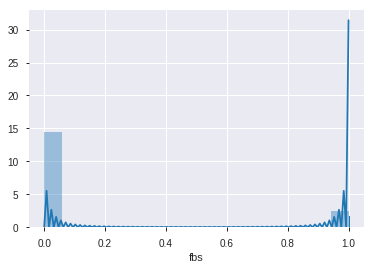

In [18]:
sns.distplot(df['fbs'],rug=True)
plt.show()

In [19]:
col='fbs'
d1=df[df['target']==0]
d2=df[df['target']==1]
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name=0, marker=dict(color="#a678de"))
trace2 = go.Bar(x=v2[col], y=v2["count"], name=1, marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout={'title':"target over the person's fasting blood sugar ",'xaxis':{'title':"fbs(> 120 mg/dl, 1 = true; 0 = false)"}}
#layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
iplot(fig)

The 51.2% person having the fasting blood sugar rate over 120 mg/dl and 55% person having the fasting blood sugar rate below 120 mg/dl is affected by heart disease.

#### AGE

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



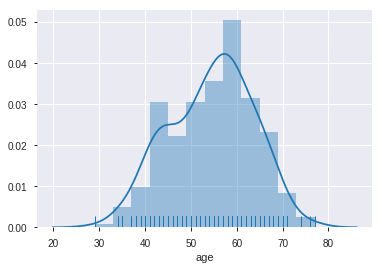

In [20]:
sns.distplot(df['age'],rug=True)
plt.show()

In [21]:
col='age'
d1=df[df['target']==0]
d2=df[df['target']==1]
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name=0, marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name=1, marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout={'title':"target over the age"}
fig = go.Figure(data, layout=layout)
iplot(fig)

From this plot we identify that person having age between 40 to 65 year is more likely to affected by heart disease, therefor person having the age in this range have to more concisous about there health. 

## Symptoms

* Chest pain, chest tightness, chest pressure and chest discomfort (angina)
* Shortness of breath
* Pain, numbness, weakness or coldness in your legs or arms if the blood vessels in those parts of your body are narrowed
* Pain in the neck, jaw, throat, upper abdomen or back.
* Heart failure is also an outcome of heart disease, and breathlessness can occur when the heart becomes too weak to circulate blood.
* Some heart conditions occur with no symptoms at all, especially in older adults and individuals with diabetes.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



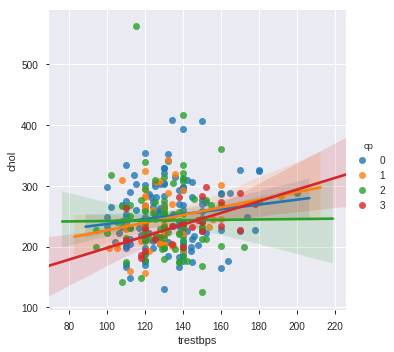

In [22]:
sns.lmplot(x="trestbps", y="chol",data=df,hue="cp")
plt.show()

## Creating Dummy Variables
from the dataset'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [23]:
chest_pain=pd.get_dummies(df['cp'],prefix='cp',drop_first=True)
df=pd.concat([df,chest_pain],axis=1)
df.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(df['slope'],prefix='slope')
th=pd.get_dummies(df['thal'],prefix='thal')
frames=[df,sp,th]
df=pd.concat(frames,axis=1)
df.drop(['slope','thal'],axis=1,inplace=True)

In [24]:
df.head(5)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,0,1,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,0,1,1,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,0,1,0,0,1,0


### Feature selection

#### **>>** Xstant=X-mean(X)/st.dev(X)

#### **>>** Xnorm=X-min(X)/max(X)-min(X)

In [25]:
X = df.drop(['target'], axis = 1)
y = df.target.values

#### Spliting the 80% of the dataset into train_data and 20% of the dataset into test_data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

StandardScaler will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. Given the distribution of the data, each value in the dataset will have the sample mean value subtracted, and then divided by the standard deviation of the whole dataset.

In [27]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.



## Creating Different Machine Learning Model 

#### Training & Testing of Model

We have used a number of machine learning algorithms,these are 
* 1.logistic regression
> The meaning of the term regression is very simple: any process that attempts to find relationships between variables is called regression. Logistic regression is regression because it finds relationships between variables. It is logistic because it uses logistic function as a link function.
* 2.support vector machine (SVM)
> A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. So you're working on a text classification problem.
* 3.k nearest neighborhood (kNN)
> K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition
* 4.GradientBoostingClassifier
> Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models
* 5.RandomForestClassifier
> Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees
* 6.GaussianNB
> Other functions can be used to estimate the distribution of the data, but the Gaussian (or Normal distribution) is the easiest to work with because you only need to estimate the mean and the standard deviation from your training data.
* 7.DecisionTreeClassifier algorithms. 
> A decision tree classifier is a tree in which internal nodes are labeled by features. ... The classifier categorizes an object xi by recursively testing for the weights that the features labeling the internal nodes have in vector xi, until a leaf node is reached. The label of this node is then assigned to xi

In [28]:
#LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)

#SVM classifier
svc_c=SVC(kernel='linear',random_state=0)
svc_c.fit(X_train,y_train)
svc_pred=svc_c.predict(X_test)
sv_cm=confusion_matrix(y_test,svc_pred)
sv_ac=accuracy_score(y_test, svc_pred)

#Bayes
gaussian=GaussianNB()
gaussian.fit(X_train,y_train)
bayes_pred=gaussian.predict(X_test)
bayes_cm=confusion_matrix(y_test,bayes_pred)
bayes_ac=accuracy_score(bayes_pred,y_test)

#SVM regressor
svc_r=SVC(kernel='rbf')
svc_r.fit(X_train,y_train)
svr_pred=svc_r.predict(X_test)
svr_cm=confusion_matrix(y_test,svr_pred)
svr_ac=accuracy_score(y_test, svr_pred)

#RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)

#KNN
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_cm=confusion_matrix(y_test,knn_pred)
knn_ac=accuracy_score(knn_pred,y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



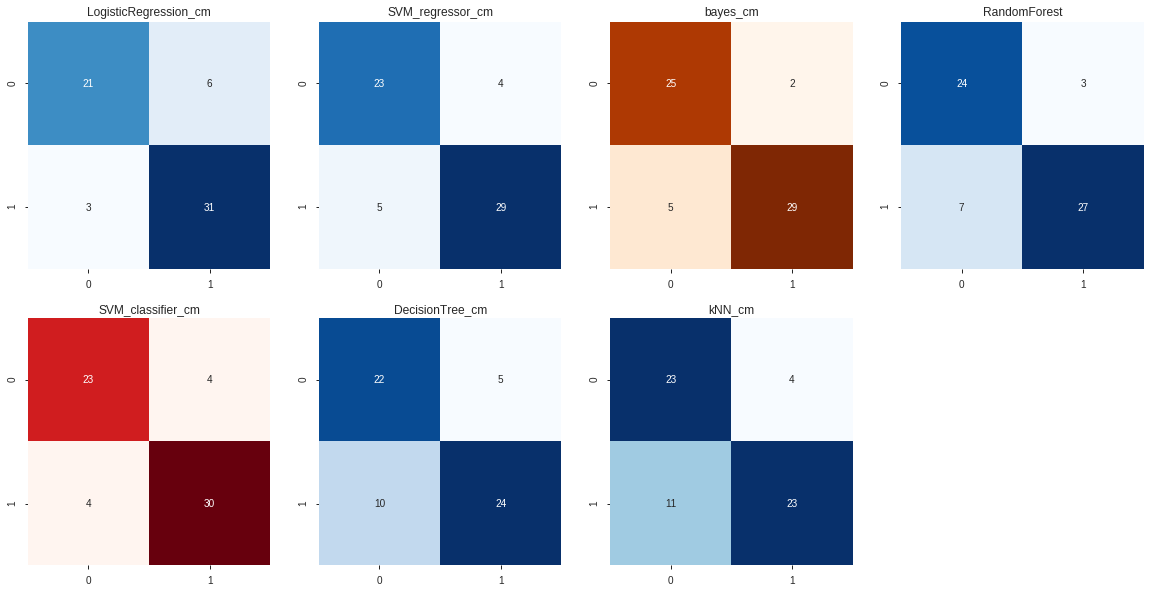

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.title("LogisticRegression_cm")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,4,2)
plt.title("SVM_regressor_cm")
sns.heatmap(sv_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,4,3)
plt.title("bayes_cm")
sns.heatmap(bayes_cm,annot=True,cmap="Oranges",fmt="d",cbar=False)
plt.subplot(2,4,4)
plt.title("RandomForest")
sns.heatmap(rdf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,4,5)
plt.title("SVM_classifier_cm")
sns.heatmap(svr_cm,annot=True,cmap="Reds",fmt="d",cbar=False)
plt.subplot(2,4,6)
plt.title("DecisionTree_cm")
sns.heatmap(dtree_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,4,7)
plt.title("kNN_cm")
sns.heatmap(knn_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

### Accuracy of the models

In [30]:
print('LogisticRegression_accuracy:\t',lr_ac)
print('SVM_regressor_accuracy:\t\t',svr_ac)
print('RandomForest_accuracy:\t\t',rdf_ac)
print('DecisionTree_accuracy:\t\t',dtree_ac)
print('KNN_accuracy:\t\t\t',knn_ac)
print('SVM_classifier_accuracy:\t',sv_ac)
print('Bayes_accuracy:\t\t\t',bayes_ac)

LogisticRegression_accuracy:	 0.8524590163934426
SVM_regressor_accuracy:		 0.8688524590163934
RandomForest_accuracy:		 0.8360655737704918
DecisionTree_accuracy:		 0.7540983606557377
KNN_accuracy:			 0.7540983606557377
SVM_classifier_accuracy:	 0.8524590163934426
Bayes_accuracy:			 0.8852459016393442


#### ROC and Precision Recall Curve for the model which gives the heighest accuracy

* A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.
* A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds, much like the ROC curve. A no-skill classifier is one that cannot discriminate between the classes and would predict a random class or a constant class in all cases


In [31]:
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

<Figure size 432x288 with 0 Axes>

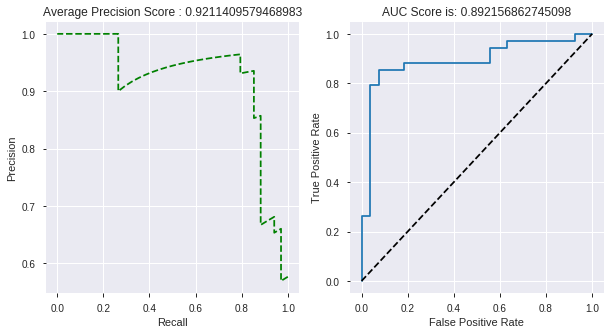

In [32]:
plt.figure()
plotting(y_test,gaussian.predict_proba(X_test))

#### Plotting the Accuracy of the models

Here we plot the performance or the accuracy of the different machine learning model, in this plot we observe that the different models have diffrent performence.

Text(0.5, 1.0, 'Model Accracy')

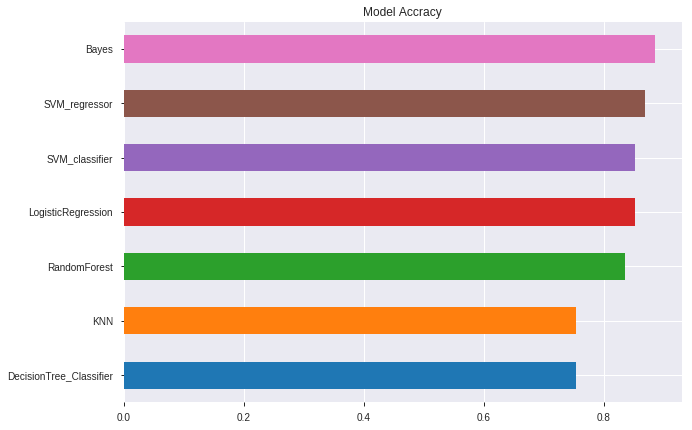

In [33]:
model_accuracy = pd.Series(data=[lr_ac,sv_ac,bayes_ac,svr_ac,rdf_ac,dtree_ac,knn_ac], 
                index=['LogisticRegression','SVM_classifier','Bayes','SVM_regressor',
                                      'RandomForest','DecisionTree_Classifier','KNN'])
fig= plt.figure(figsize=(10,7))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')

## Preventions

* Quit smoking.
* Control other health conditions, such as high blood pressure, high cholesterol and diabetes.
* Exercise at least 30 minutes a day on most days of the week.
* Eat a diet that's low in salt and saturated fat.
* Maintain a healthy weight.
* Reduce and manage stress.
* Practice good hygiene.

### Summary
We started with the data exploration where we got a feeling for the dataset, checked about missing data and learned which features are important. During this process we used Plotly, seaborn and matplotlib to do the visualizations. During the data preprocessing part, we converted features into numeric ones, grouped values into categories and created a few new features. Afterwards we started training machine learning models, and applied cross validation on it. Of course there is still room for improvement, like doing a more extensive feature engineering, by comparing and plotting the features against each other and identifying and removing the noisy features. You could also do some ensemble learning.Lastly, we looked at it’s confusion matrix and computed the models precision.

## Your feedback is very important to me,I hope this kernel is helpfull for you -->> upvote will appreciate me for further work.